# Load Data

In [ ]:
# Loading Data Untuk Latihan
import warnings; warnings.simplefilter('ignore')
import pandas as pd # Loading Module yang dibutuhkan

file_ = 'data/adult.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv
    df = pd.read_csv(file_)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

--2023-11-16 12:15:46--  https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5342628 (5.1M) [text/plain]
Saving to: ‘data/adult.csv’

adult.csv           100%[===================>]   5.09M  --.-KB/s    in 0.1s    

2023-11-16 12:15:46 (51.7 MB/s) - ‘data/adult.csv’ saved [5342628/5342628]

baris =  48842 , Kolom (jumlah variabel) =  15


,Umur,Sektor,fnlwgt,Pendidikan,KelasPendidikan,Status,Pekerjaan,Relationship,Ras,Gender,Gain,Loss,JamKerjaHarian,AsalNegara,Penghasilan
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Umur             48842 non-null  int64 
 1   Sektor           48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   Pendidikan       48842 non-null  object
 4   KelasPendidikan  48842 non-null  int64 
 5   Status           48842 non-null  object
 6   Pekerjaan        48842 non-null  object
 7   Relationship     48842 non-null  object
 8   Ras              48842 non-null  object
 9   Gender           48842 non-null  object
 10  Gain             48842 non-null  int64 
 11  Loss             48842 non-null  int64 
 12  JamKerjaHarian   48842 non-null  int64 
 13  AsalNegara       48842 non-null  object
 14  Penghasilan      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

,Sektor,Pendidikan,Status,Pekerjaan,Relationship,Ras,Gender,AsalNegara,Penghasilan
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


### Mengubah kolom yang bertipe objek menjadi kategori

In [ ]:
for col in varObjects.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Umur             48842 non-null  int64   
 1   Sektor           48842 non-null  category
 2   fnlwgt           48842 non-null  int64   
 3   Pendidikan       48842 non-null  category
 4   KelasPendidikan  48842 non-null  int64   
 5   Status           48842 non-null  category
 6   Pekerjaan        48842 non-null  category
 7   Relationship     48842 non-null  category
 8   Ras              48842 non-null  category
 9   Gender           48842 non-null  category
 10  Gain             48842 non-null  int64   
 11  Loss             48842 non-null  int64   
 12  JamKerjaHarian   48842 non-null  int64   
 13  AsalNegara       48842 non-null  category
 14  Penghasilan      48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


# **Penelaahan Data**

## 1. Data Understanding dan Seleksi Fitur Pertama
Variabel "fnlwgt" tidak ada keterangan di sumber data, asumsikan variabel ini bermanfaat.


## 2. Check Noise

In [ ]:
df.describe()

,Umur,fnlwgt,KelasPendidikan,Gain,Loss,JamKerjaHarian
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Pada variabel Gain, nilai max sebesar 99999 maka perlu diperiksa apakah nilai tersebut merupakan noise atau bukan

### Check Noise di variabel kategorik

In [ ]:
# get all unique values of a variable/column
catVar = df.select_dtypes(include = ['object', 'category'])

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

Sektor :  {'State-gov', 'Self-emp-inc', 'Private', 'Without-pay', '?', 'Federal-gov', 'Self-emp-not-inc', 'Never-worked', 'Local-gov'}
Pendidikan :  {'Bachelors', 'HS-grad', 'Doctorate', 'Masters', '12th', '9th', 'Preschool', 'Some-college', '10th', 'Prof-school', '7th-8th', 'Assoc-acdm', '1st-4th', '11th', 'Assoc-voc', '5th-6th'}
Status :  {'Never-married', 'Divorced', 'Widowed', 'Separated', 'Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent'}
Pekerjaan :  {'Tech-support', 'Machine-op-inspct', 'Exec-managerial', 'Prof-specialty', 'Craft-repair', 'Farming-fishing', 'Armed-Forces', 'Priv-house-serv', 'Sales', 'Protective-serv', 'Adm-clerical', '?', 'Handlers-cleaners', 'Transport-moving', 'Other-service'}
Relationship :  {'Own-child', 'Husband', 'Unmarried', 'Not-in-family', 'Wife', 'Other-relative'}
Ras :  {'White', 'Black', 'Amer-Indian-Eskimo', 'Other', 'Asian-Pac-Islander'}
Gender :  {'Female', 'Male'}
AsalNegara :  {'France', 'Hungary', 'United-States', 'Ireland', '

- Pada variabel sektor, pekerjaan, penghasilan dan asal negara terdapat noise yaitu "?"
- Pada variabel penghasilan juga terdapat "<=50K." dan ">50K."
- Penanganan: tanda "?" pada variabel sektor, pekerjaan, penghasilan dan asal negara merupakan missing value maka diubah menjadi nan dan tanda "." akan dihapus








In [ ]:
import numpy as np

df['Penghasilan'] = df['Penghasilan'].replace(to_replace=">50K.", value=">50K")
df['Penghasilan'] = df['Penghasilan'].replace(to_replace="<=50K.", value="<=50K")
df['Sektor'] = df['Sektor'].replace(to_replace="?", value=np.nan)
df['Pekerjaan'] = df['Pekerjaan'].replace(to_replace="?", value=np.nan)
df['AsalNegara'] = df['AsalNegara'].replace(to_replace="?", value=np.nan)

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

Sektor :  {'State-gov', nan, 'Self-emp-inc', 'Private', 'Without-pay', 'Federal-gov', 'Self-emp-not-inc', 'Never-worked', 'Local-gov'}
Pendidikan :  {'Bachelors', 'HS-grad', 'Doctorate', 'Masters', '12th', '9th', 'Preschool', 'Some-college', '10th', 'Prof-school', '7th-8th', 'Assoc-acdm', '1st-4th', '11th', 'Assoc-voc', '5th-6th'}
Status :  {'Never-married', 'Divorced', 'Widowed', 'Separated', 'Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent'}
Pekerjaan :  {'Tech-support', 'Machine-op-inspct', nan, 'Exec-managerial', 'Prof-specialty', 'Craft-repair', 'Farming-fishing', 'Armed-Forces', 'Priv-house-serv', 'Sales', 'Protective-serv', 'Adm-clerical', 'Handlers-cleaners', 'Transport-moving', 'Other-service'}
Relationship :  {'Own-child', 'Husband', 'Unmarried', 'Not-in-family', 'Wife', 'Other-relative'}
Ras :  {'White', 'Black', 'Amer-Indian-Eskimo', 'Other', 'Asian-Pac-Islander'}
Gender :  {'Female', 'Male'}
AsalNegara :  {'France', nan, 'Hungary', 'United-States', 'Irelan

### Check noise di variabel numerik

In [ ]:
# import Module yang dibutuhkan untuk Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.color_palette("tab20"); sns.set()

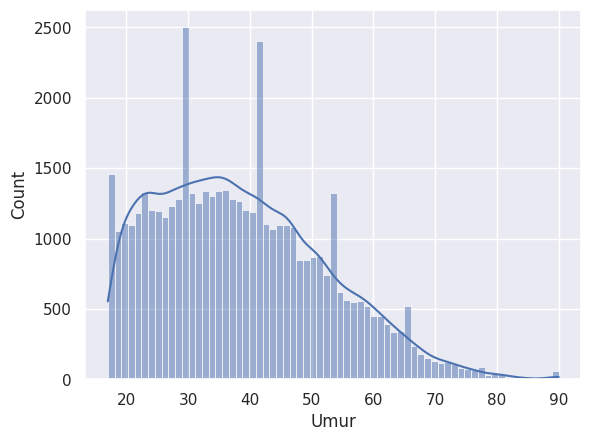

,Umur
count,48842.000000
mean,38.643585
std,13.710510
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='Umur', kde=True)
plt.show()
df[['Umur']].describe()

grafik cenderung skew kanan dan terdapat sedikit outlier yaitu umur 90 tahun

Grafik distribusi cenderung skew kanan dan terdapat sedikit outlier yaitu mengarah pada umur 90 tahun. Tetapi hal tersebut perlu dianalisis lebih dalam, jika diasumsikan dengan jenis pekerjaan wirausaha maka pekerja dengan umur 90 tahun bisa saja ada dan menjadi outlier. Sedangkan jika diasumsikan jenis pekerjaan tersebut karyawan maka dengan pekerja dengan umur 90 tahun tidak ada dan menjadi noise.


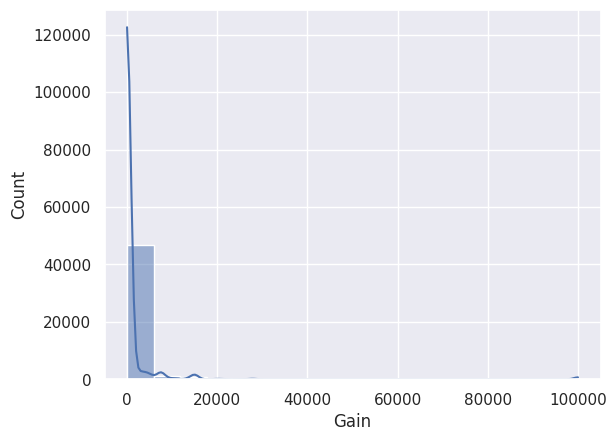

,Gain
count,48842.000000
mean,1079.067626
std,7452.019058
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,99999.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='Gain', kde=True)
plt.show()
df[['Gain']].describe()

terdapat banyak yang nilainya 0 dan tidak banyak nilai selain antara 20k - 99k.

diasumsikan sebagai missing value maka akan di-replace dengan np.nan

In [ ]:
# asumsikan nilai gain 99999 merupakan noise sehingga didrop
# delete Rows dengan kondisi
df.drop(df[(df.Gain == 99999.000000)].index, inplace=True)
# untuk mengingatnya, bayangkan saja "parameter" dari drop adalah int index seperti di penjelasan cell sebelumnya
print(df.shape)
df.head(5)

(48598, 15)


,Umur,Sektor,fnlwgt,Pendidikan,KelasPendidikan,Status,Pekerjaan,Relationship,Ras,Gender,Gain,Loss,JamKerjaHarian,AsalNegara,Penghasilan
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# asumsikan nilai gain 99999.000000 merupakan missing value sehingga diraplace np.nan
df['Gain'] = df['Gain'].replace(to_replace="99999.000000", value=np.nan)

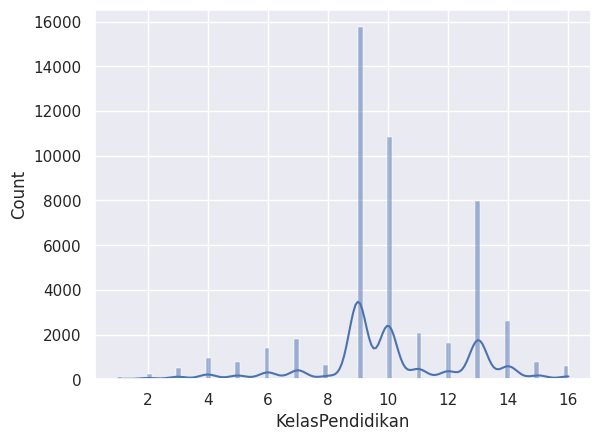

,KelasPendidikan
count,48598.000000
mean,10.063295
std,2.562932
min,1.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,16.000000


In [ ]:
# Visual Python: Visualization > Seaborn
# Distribusi variabel kelasPendidikan
sns.histplot(data=df, x='KelasPendidikan', kde=True)
plt.show()
df[['KelasPendidikan']].describe()

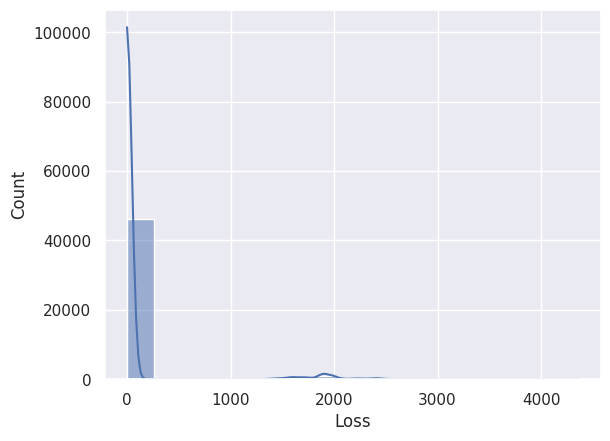

,Loss
count,48598.000000
mean,87.941644
std,403.967187
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4356.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='Loss', kde=True)
plt.show()
df[['Loss']].describe()

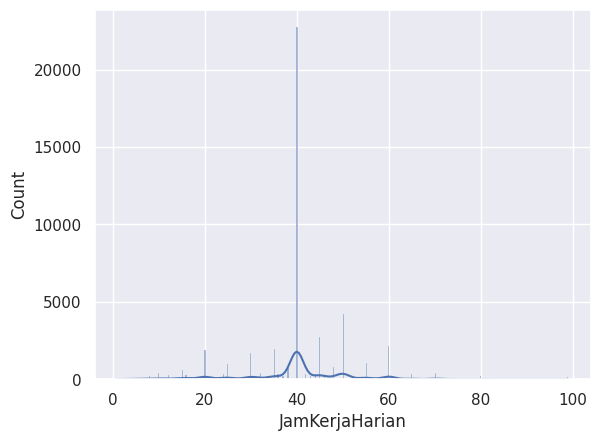

,JamKerjaHarian
count,48598.000000
mean,40.371908
std,12.369769
min,1.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,99.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='JamKerjaHarian', kde=True)
plt.show()
df[['JamKerjaHarian']].describe()

## 3. Memeriksa Duplikasi

In [ ]:
# mengecek apakah ada duplikat data sangatlah mudah menggunakan Pandas
# Bayangkan jika menggunakan Excel.
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True].head()
# Perhatikan kalau sebelumnya kita tidak "Drop" var observasi,
# maka kita tidak akan mendapatkan duplikasi dengan cara ini.

(48598, 15)
jumlah data yang duplikat 52


,Umur,Sektor,fnlwgt,Pendidikan,KelasPendidikan,Status,Pekerjaan,Relationship,Ras,Gender,Gain,Loss,JamKerjaHarian,AsalNegara,Penghasilan
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [ ]:
#menghapus entri yang memiliki data duplikat
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum()) # no more duplicates
print(df.shape) # re-check by printing data size

0
(48546, 15)


## 4. Memeriksa Outlier

NameError: ignored

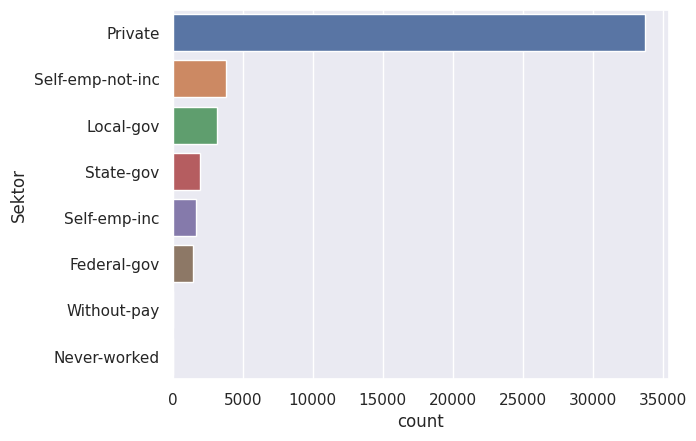

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='Sektor', order=df['Sektor'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

sektor without-pay dan never-worked terlalu sedikit dalam hal ini jadi outlier

In [ ]:
minoritas = df[df["Sektor"].isin(["Without-pay","Never-worked"])]
minoritas.describe(include='all')

,Umur,Sektor,fnlwgt,Pendidikan,KelasPendidikan,Status,Pekerjaan,Relationship,Ras,Gender,Gain,Loss,JamKerjaHarian,AsalNegara,Penghasilan
count,31.000000,31,31.000000,31,31.000000,31,21,31,31,31,31.000000,31.000000,31.000000,31,31
unique,NaN,2,NaN,6,NaN,5,9,6,3,2,NaN,NaN,NaN,2,2
top,NaN,Without-pay,NaN,HS-grad,NaN,Married-civ-spouse,Farming-fishing,Own-child,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,21,NaN,16,NaN,14,8,15,26,21,NaN,NaN,NaN,30,29
mean,38.451613,NaN,183106.096774,NaN,8.483871,NaN,NaN,NaN,NaN,NaN,220.322581,60.870968,32.322581,NaN,NaN
std,21.052060,NaN,93727.278012,NaN,1.997848,NaN,NaN,NaN,NaN,NaN,891.135021,338.915205,15.629858,NaN,NaN
min,17.000000,NaN,27012.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,4.000000,NaN,NaN
25%,19.000000,NaN,134392.500000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,20.000000,NaN,NaN
50%,29.000000,NaN,172949.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,35.000000,NaN,NaN
75%,62.000000,NaN,214294.500000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN


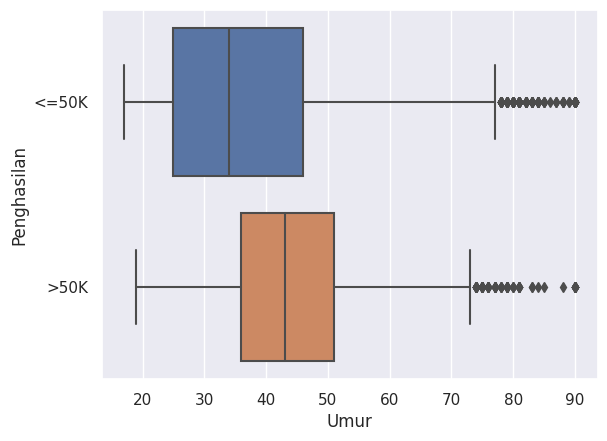

In [ ]:
# Visual Python: Visualization > Seaborn
p = sns.boxplot(x="Umur", y="Penghasilan", data=df)
plt.show()

Q1=28.0, Q3=48.0, IQR=20.0


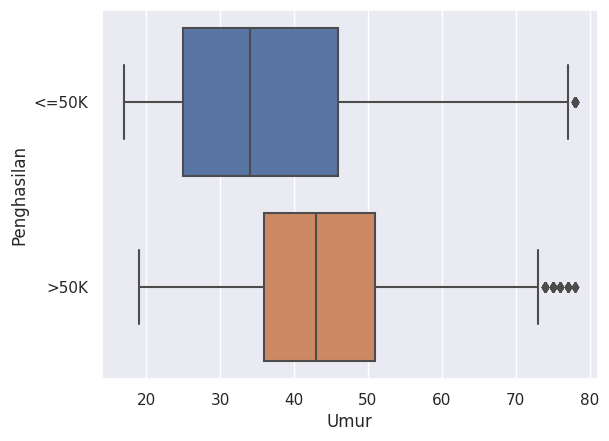

((48332, 15), (48546, 15))

In [ ]:
Q1 = df['Umur'].quantile(0.25)
Q3 = df['Umur'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

DfNoOutliers = df.drop(df[(df.Umur < Q1-1.5*IQR) | (df.Umur > Q3+1.5*IQR)].index)
p = sns.boxplot(x="Umur", y="Penghasilan", data=DfNoOutliers)
plt.show()
DfNoOutliers.shape, df.shape

terdapat banyak outlier, hasil saat sudah di filter juga masih terdapat outlier. Dalam hal ini, outlier di atas akan dibiarkan saja

## 5. Missing Value

In [ ]:
# General Look at the Missing Values
print(df.isnull().sum())

Umur                  0
Sektor             2790
fnlwgt                0
Pendidikan            0
KelasPendidikan       0
Status                0
Pekerjaan          2800
Relationship          0
Ras                   0
Gender                0
Gain                  0
Loss                  0
JamKerjaHarian        0
AsalNegara          846
Penghasilan           0
dtype: int64


In [ ]:
(df.isnull().sum()/len(df)*100).to_frame('persentase missing')

,persentase missing
Umur,0.000000
Sektor,5.747126
fnlwgt,0.000000
Pendidikan,0.000000
KelasPendidikan,0.000000
Status,0.000000
Pekerjaan,5.767725
Relationship,0.000000
Ras,0.000000
Gender,0.000000


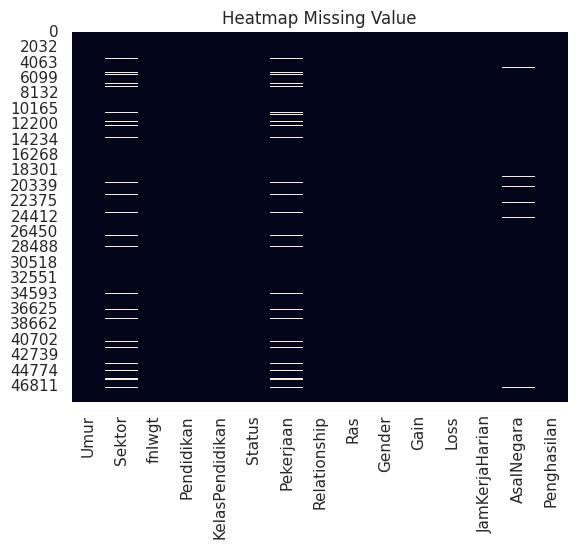

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
X = df.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
#df.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
#df.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
#df.dropna(subset=['Pekerjaan'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
print(df.shape, X.shape)
X.head()

(48546, 15) (44946, 15)


,Umur,Sektor,fnlwgt,Pendidikan,KelasPendidikan,Status,Pekerjaan,Relationship,Ras,Gender,Gain,Loss,JamKerjaHarian,AsalNegara,Penghasilan
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
print(X.isnull().sum())

Umur               0
Sektor             0
fnlwgt             0
Pendidikan         0
KelasPendidikan    0
Status             0
Pekerjaan          0
Relationship       0
Ras                0
Gender             0
Gain               0
Loss               0
JamKerjaHarian     0
AsalNegara         0
Penghasilan        0
dtype: int64


In [ ]:
# Misal di imputasi dengan Modus .... apa yang terjadi?
print(df.isnull().sum())

df["Sektor"].fillna(df["Sektor"].mode(), inplace = True)

print('\n\n',df.isnull().sum())

Umur                  0
Sektor             2790
fnlwgt                0
Pendidikan            0
KelasPendidikan       0
Status                0
Pekerjaan          2800
Relationship          0
Ras                   0
Gender                0
Gain                  0
Loss                  0
JamKerjaHarian        0
AsalNegara          846
Penghasilan           0
dtype: int64


 Umur                  0
Sektor             2790
fnlwgt                0
Pendidikan            0
KelasPendidikan       0
Status                0
Pekerjaan          2800
Relationship          0
Ras                   0
Gender                0
Gain                  0
Loss                  0
JamKerjaHarian        0
AsalNegara          846
Penghasilan           0
dtype: int64


In [ ]:
print(df.isnull().sum())

df["Sektor"].fillna(df["Sektor"].value_counts().index[0], inplace = True)

print('\n\n',df.isnull().sum())

Umur                  0
Sektor             2790
fnlwgt                0
Pendidikan            0
KelasPendidikan       0
Status                0
Pekerjaan          2800
Relationship          0
Ras                   0
Gender                0
Gain                  0
Loss                  0
JamKerjaHarian        0
AsalNegara          846
Penghasilan           0
dtype: int64


 Umur                  0
Sektor                0
fnlwgt                0
Pendidikan            0
KelasPendidikan       0
Status                0
Pekerjaan          2800
Relationship          0
Ras                   0
Gender                0
Gain                  0
Loss                  0
JamKerjaHarian        0
AsalNegara          846
Penghasilan           0
dtype: int64


In [ ]:
df["Sektor"].unique()

['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
                         'Self-emp-not-inc', 'State-gov', 'Without-pay']

In [ ]:
df["Pekerjaan"].fillna(df["Pekerjaan"].value_counts().index[0], inplace = True)

print('\n\n',df.isnull().sum())



 Umur                 0
Sektor               0
fnlwgt               0
Pendidikan           0
KelasPendidikan      0
Status               0
Pekerjaan            0
Relationship         0
Ras                  0
Gender               0
Gain                 0
Loss                 0
JamKerjaHarian       0
AsalNegara         846
Penghasilan          0
dtype: int64


In [ ]:
df["AsalNegara"].fillna(df["AsalNegara"].value_counts().index[0], inplace = True)

print('\n\n',df.isnull().sum())



 Umur               0
Sektor             0
fnlwgt             0
Pendidikan         0
KelasPendidikan    0
Status             0
Pekerjaan          0
Relationship       0
Ras                0
Gender             0
Gain               0
Loss               0
JamKerjaHarian     0
AsalNegara         0
Penghasilan        0
dtype: int64


In [ ]:
df["AsalNegara"].unique()

['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', ..., 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands']
Length: 41
Categories (41, object): ['Cambodia', 'Canada', 'China', 'Columbia', ..., 'Trinadad&Tobago',
                          'United-States', 'Vietnam', 'Yugoslavia']

## 6. Transformasi

### One Hot Encoding

In [ ]:
df['Penghasilan'].unique()

['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']

In [ ]:
df2 = pd.get_dummies(df['Ras'], prefix='')
df2.head()

,_Amer-Indian-Eskimo,_Asian-Pac-Islander,_Black,_Other,_White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


### Transformasi di seluruh variabel kategorik

In [ ]:
print(df.shape)
for col in catVar.columns:
    if col != 'Penghasilan':
        transformasi = pd.get_dummies(df[col], prefix='')
        df = pd.concat([df, transformasi], axis = 1)
        # Hapus Variabel Kategorik Awal, Sudah tidak diperlukan
        try:
            df.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(df.shape)
df.head()

(48546, 15)
(48546, 106)


,Umur,fnlwgt,KelasPendidikan,Gain,Loss,JamKerjaHarian,Penghasilan,_Federal-gov,_Local-gov,_Never-worked,...,_Portugal,_Puerto-Rico,_Scotland,_South,_Taiwan,_Thailand,_Trinadad&Tobago,_United-States,_Vietnam,_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Menyimpan hasil penelaahan data

In [ ]:
# Saving the preprocessed Data for future use/analysis
df.to_csv("data/adult_PreProcessed.csv", encoding='utf8', index=False)

# **Model**

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

 memprediksi seseorang berada di bawah garis kemiskinan atau tidak

In [ ]:
# Loading Data Preprocessed
file_ = 'data/adult_PreProcessed.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv
    df = pd.read_csv(file_)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

baris =  48546 , Kolom (jumlah variabel) =  106


,Umur,fnlwgt,KelasPendidikan,Gain,Loss,JamKerjaHarian,Penghasilan,_Federal-gov,_Local-gov,_Never-worked,...,_Portugal,_Puerto-Rico,_Scotland,_South,_Taiwan,_Thailand,_Trinadad&Tobago,_United-States,_Vietnam,_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Pisahkan menjadi Train dan Test Data

- train: buat bikin model optimal
- test: untuk kita evaluasi dari model yang optimal (semakin besar data testingnya, maka semakin besar merepresentasikan perform di dunia nyata dengan baik)

In [ ]:
predictor = df.loc[:, ~df.columns.isin(['Penghasilan'])]
target = df['Penghasilan']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.3, random_state=33)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(33982, 105) (33982,)
(14564, 105) (14564,)


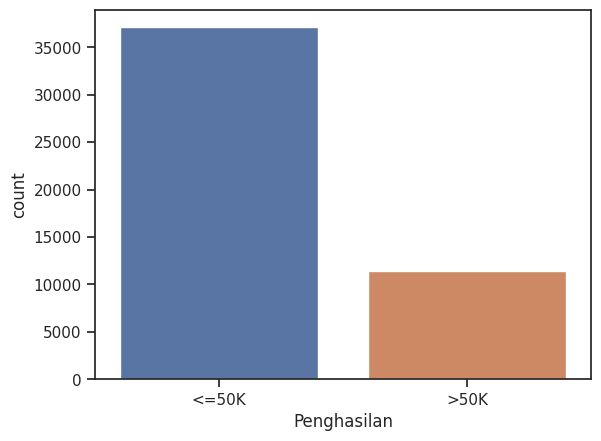

Counter({'<=50K': 37109, '>50K': 11437})
<50k =  76.44090141309273 % 50k =  23.559098586907265 %


In [ ]:
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=df, x='Penghasilan')
plt.show()

D = Counter(df['Penghasilan'])
print(D)
print("<50k = ", D['<=50K']*100/(len(df['Penghasilan'])), '% 50k = ',D['>50K']*100/(len(df['Penghasilan'])) ,'%')

# Model Regresi Logistik

In [ ]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[10758   316]
 [ 2607   883]]
              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88     11074
        >50K       0.74      0.25      0.38      3490

    accuracy                           0.80     14564
   macro avg       0.77      0.61      0.63     14564
weighted avg       0.79      0.80      0.76     14564



Interpretasi:
- miskin dan diprediksi miskin oleh model test data ada 10711 kasus
- tidak miskin dan diprediksi miskin oleh model test data ada 380 kasus
- miskin dan diprediksi tidak miskin oleh model test data ada 2616 kasus
- tidak miskin dan diprediksi tidak miskin oleh model test data ada 930 kasus
- nilai recall pada >50K sebesar 0.26 artinya banyak orang tidak miskin yang salah prediksi

## Cross Validation

In [ ]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.80 (+/- 0.01), Waktu = 11.803 detik


RegLog    0.792542
dtype: float64

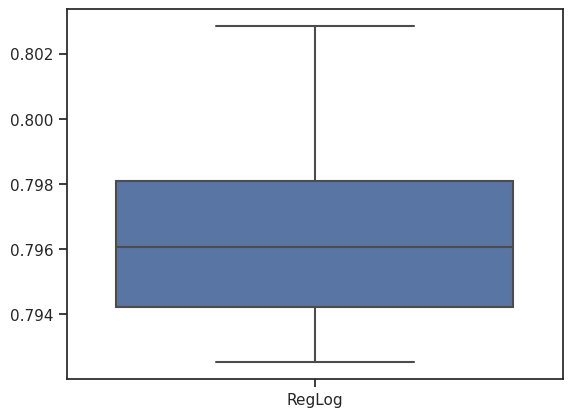

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

# Model Decision Tree

In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[9736 1338]
 [1266 2224]]
              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     11074
        >50K       0.62      0.64      0.63      3490

    accuracy                           0.82     14564
   macro avg       0.75      0.76      0.76     14564
weighted avg       0.82      0.82      0.82     14564



In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.82 (+/- 0.01), Waktu = 7.707 detik


RegLog     0.792542
DecTree    0.811290
dtype: float64

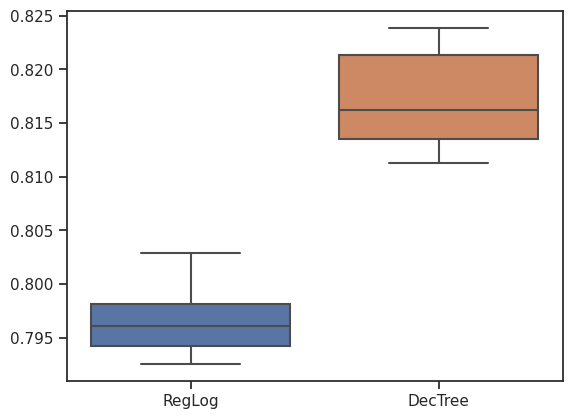

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

## Hyperparameter Optimization

In [ ]:
# Atau secara programmatic
from sklearn.pipeline import make_pipeline
from sklearn import linear_model #import LogisticRegression

pipeSVM = make_pipeline(linear_model.LogisticRegression())
print(sorted(pipeSVM.get_params().keys()))

['logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start', 'memory', 'steps', 'verbose']


In [ ]:
# Hyperparameter optimization pada model Regresi Logistik menggunakan gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search.fit(xTrain, yTrain)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
0.8493025044892655
{'solver': 'newton-cg'}


In [ ]:
pipeDT = make_pipeline(tree.DecisionTreeClassifier())
print(sorted(pipeDT.get_params().keys()))

['decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter', 'memory', 'steps', 'verbose']


In [ ]:
# Optimal parameter Desion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.8567180372442748
{'max_depth': 9, 'criterion': 'entropy'}


# Model Selection

Accuracy RL: 0.85 (+/- 0.00)
Accuracy DT: 0.86 (+/- 0.00)


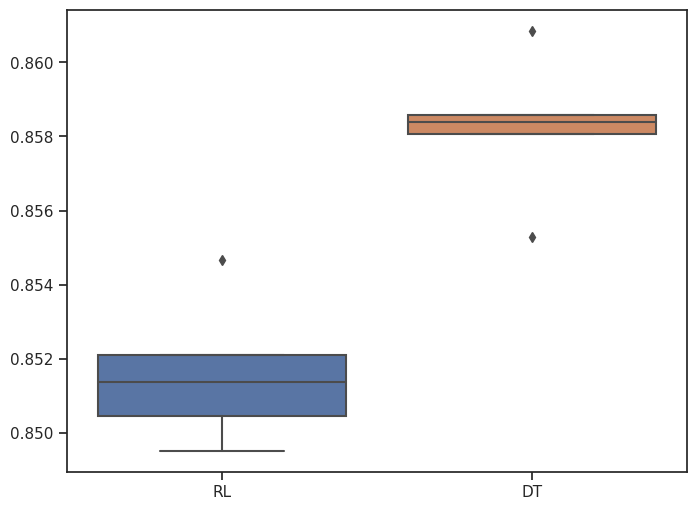

In [ ]:
kCV = 5 # Aslinya usahakan 10, idealnya 30 ... mengapa?
# Menggunakan parameter optimal
RL_opt = LogisticRegression(solver= 'newton-cg')
DT_opt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

# Melakukan Cross Validasi
models = ['RL', 'DT']
RL_score = cross_val_score(RL_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_score = cross_val_score(DT_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
scores = [RL_score, DT_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)

Berdasarkan akurasi yang diperoleh model Decision Tree lebih unggul dibandingkan model Regresi Logistik